<a href="https://colab.research.google.com/github/WaadAlharthi/ML_Portfolio/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [2]:
# Create dataframes
df_bank = pd.read_csv("1-Churn_Modelling.csv")
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df_bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df_bank.describe(include="O").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [6]:
u_geo = df_bank['Geography'].unique().tolist()
u_geo

['France', 'Spain', 'Germany']

*   We decided to remove surnames to avoid causing a racial bias

In [7]:
df_bank.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


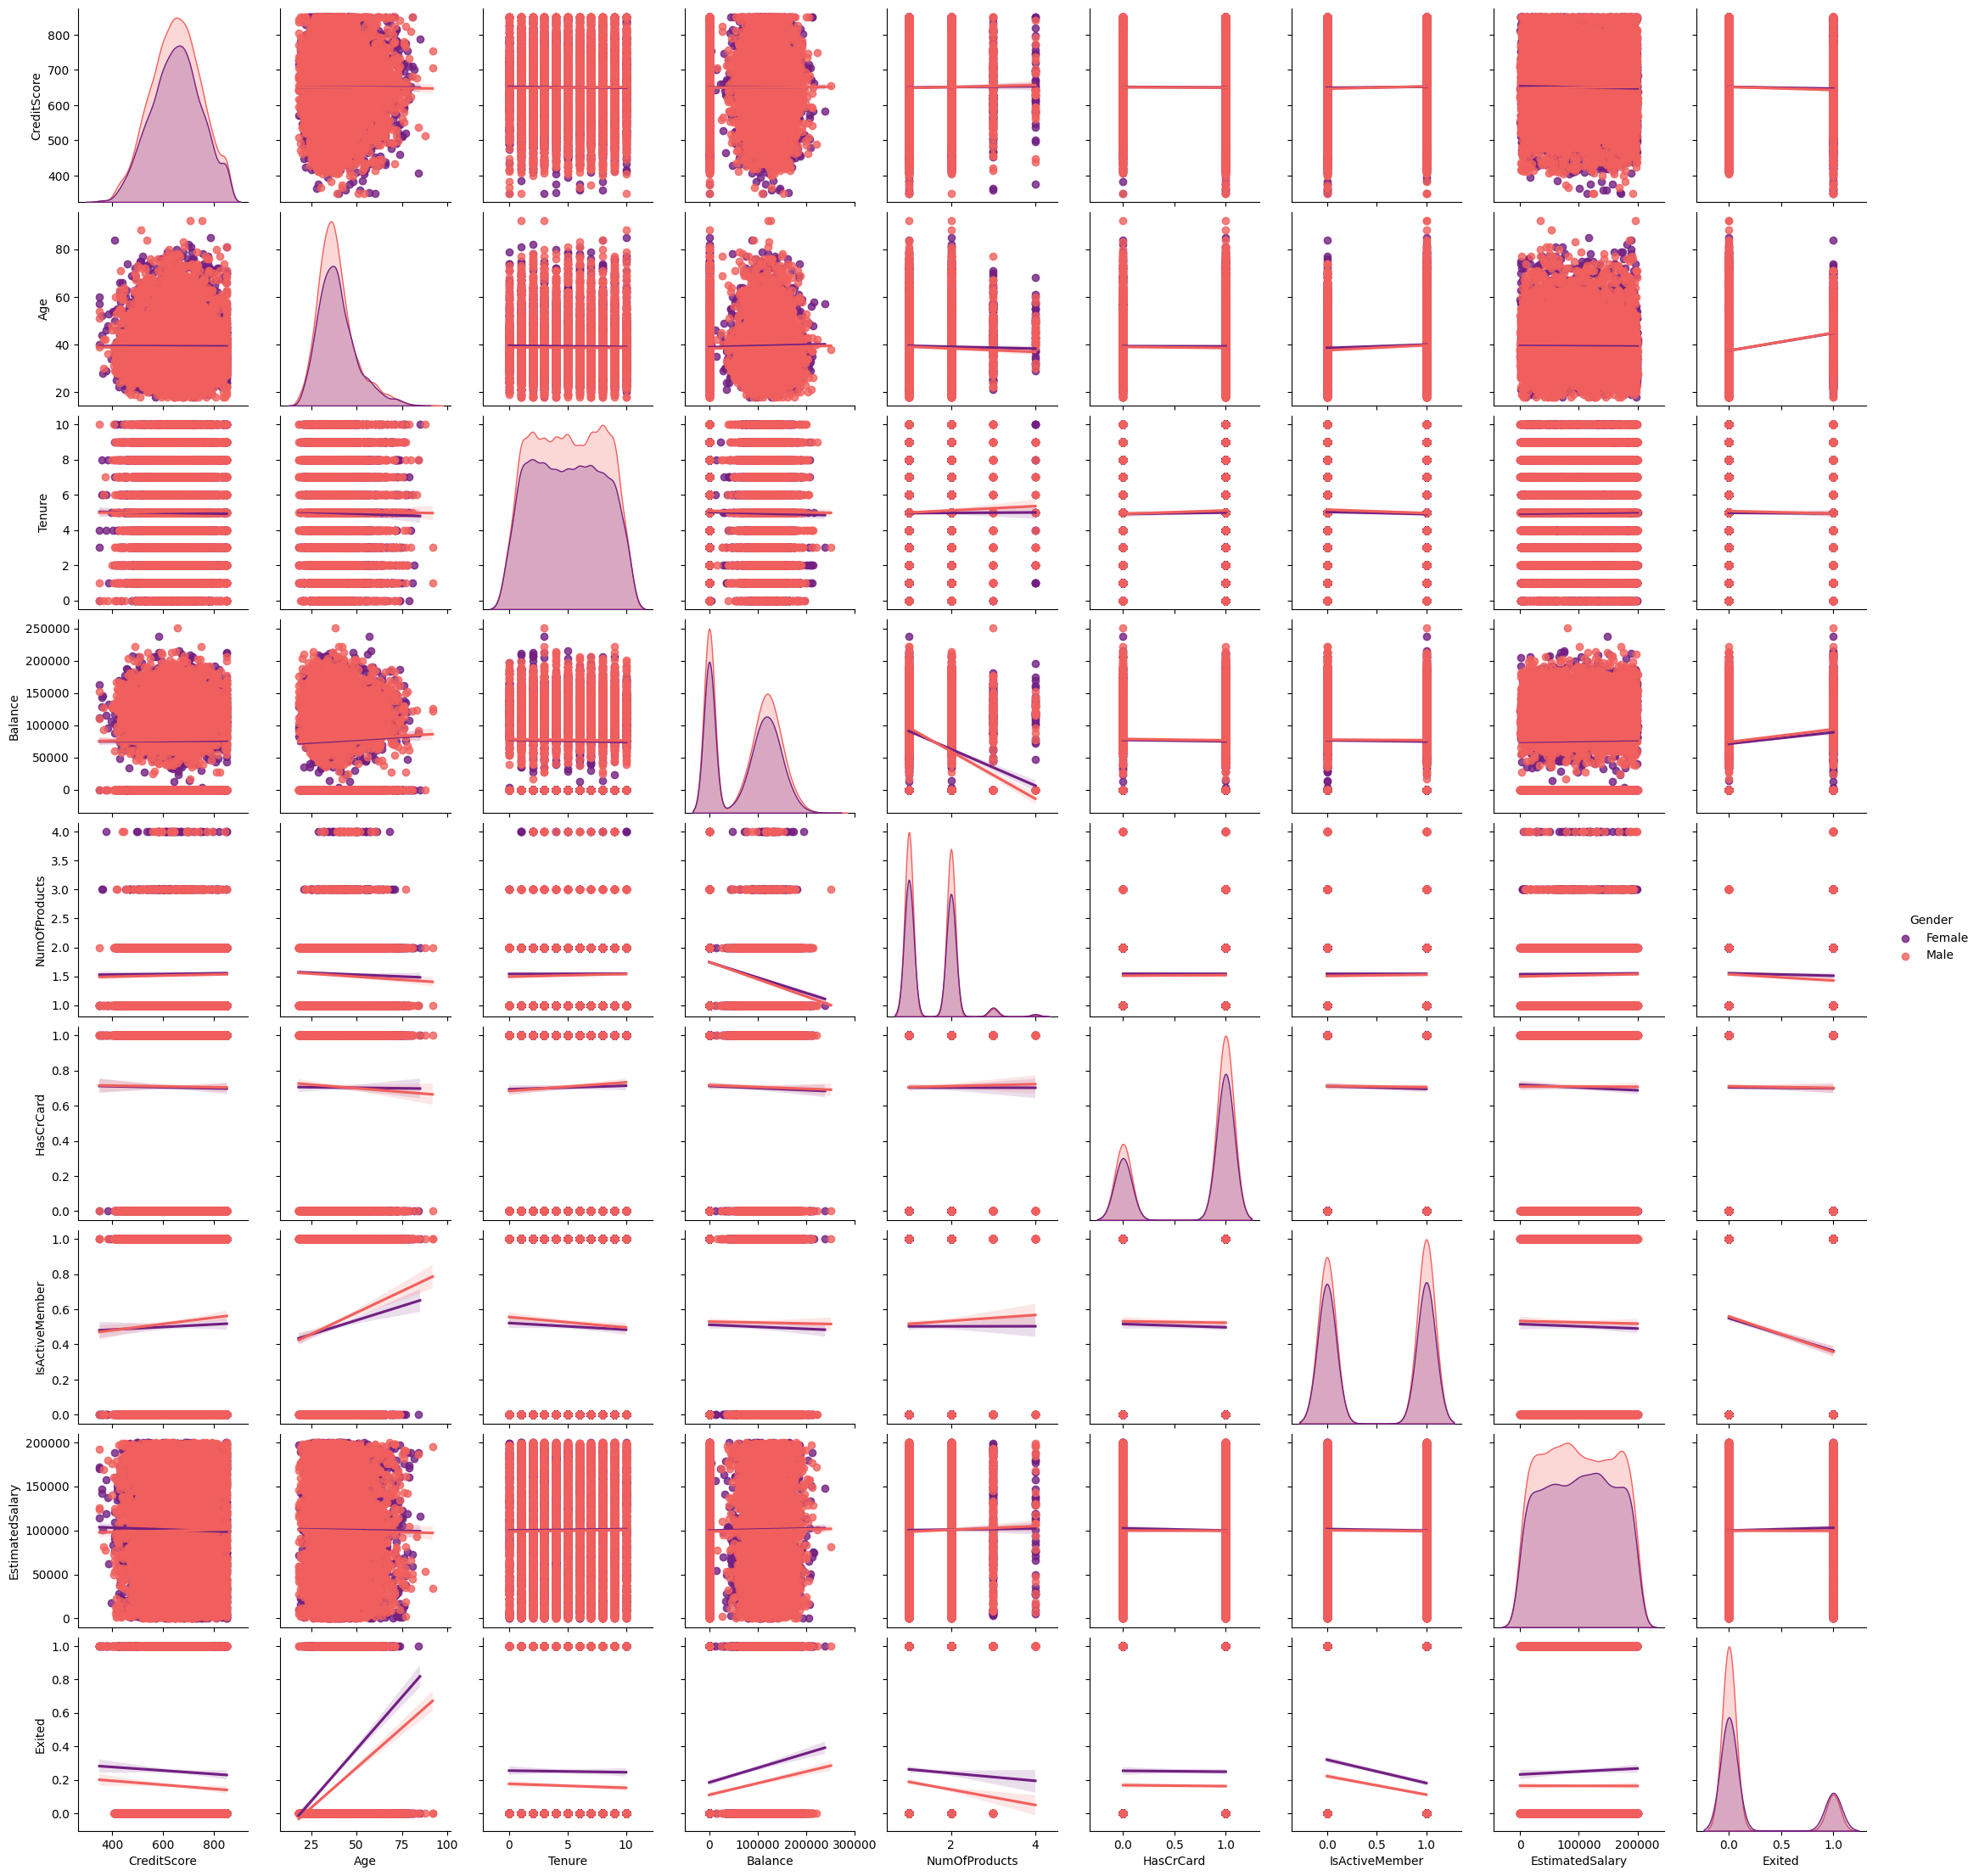

In [8]:
sns.pairplot(df_bank, kind="reg", hue='Gender', palette="magma")

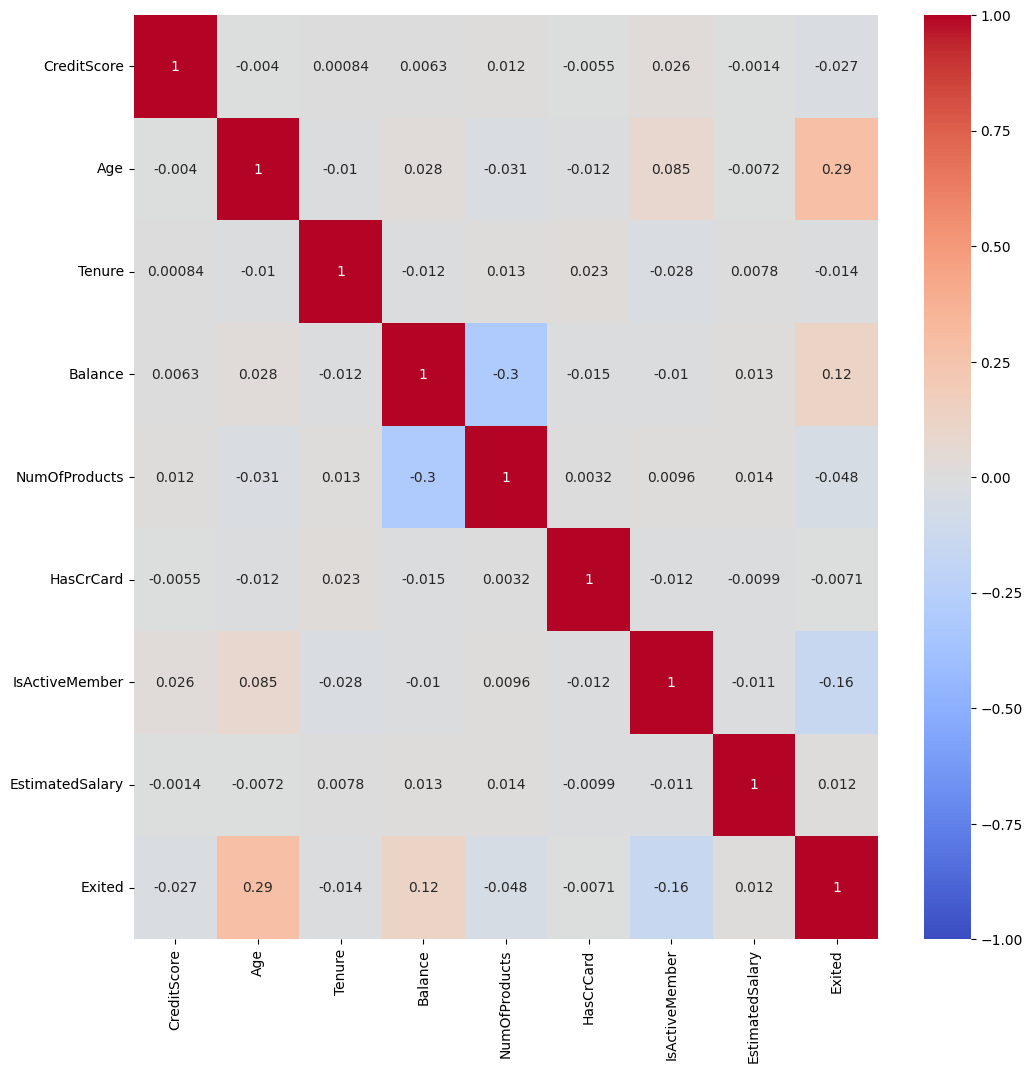

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_bank.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

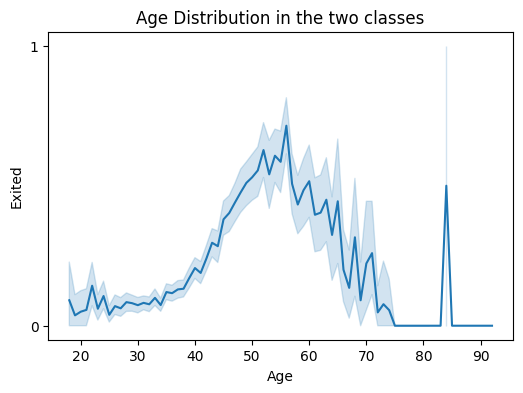

In [10]:
plt.figure(figsize=(6, 4))
sns.lineplot(x="Age", y="Exited", data=df_bank)
plt.yticks([0,1])
plt.xlabel("Age")
plt.ylabel("Exited")
plt.title("Age Distribution in the two classes")
plt.show()

In [11]:
df1, df2 = [x for _, x in df_bank.groupby(df_bank['Exited'] == 1)]
# df2 contains customers who closed their accounts

In [12]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [13]:
df1.describe(include="O").T

,count,unique,top,freq
Geography,7963,3,France,4204
Gender,7963,2,Male,4559


In [14]:
df2.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [15]:
df2.describe(include="O").T

,count,unique,top,freq
Geography,2037,3,Germany,814
Gender,2037,2,Female,1139


*   By seperating the dataset by the target labels we can see that the data is
unbalanced. The number of observations of customers who are still with the bank is 3 times the number of those who left.
*   The average age of customers who left is 44, while of the customers who stayed is 37.
*   The average of credit score and tenure is aboyt the same.





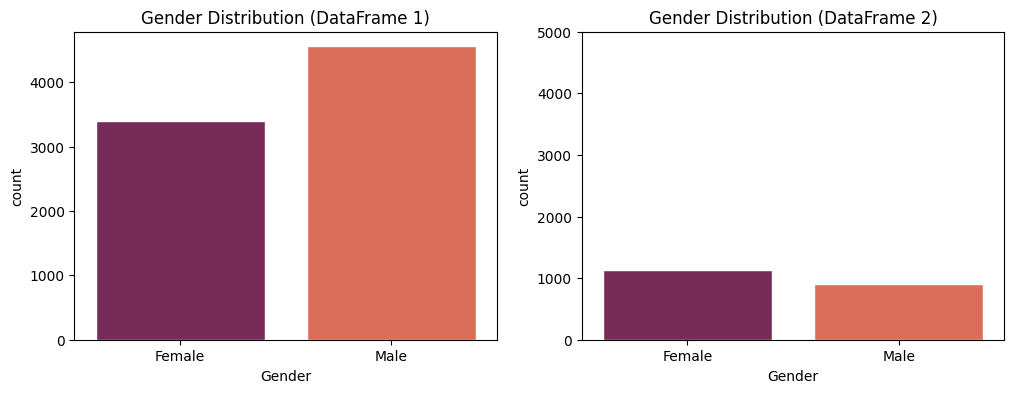

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set(style="whitegrid")
sns.countplot(x="Gender", data=df1, palette="rocket", ax=axes[0])
plt.ylim(0, 5000)
axes[0].set_title("Gender Distribution (DataFrame 1)")

# Plot the second count plot
sns.set(style="whitegrid")
sns.countplot(x="Gender", data=df2, palette="rocket", ax=axes[1])
plt.ylim(0, 5000)
axes[1].set_title("Gender Distribution (DataFrame 2)")

plt.show()

*   The female to male ratio in each class is slightly unbalanced. More female cutomers left the bank.

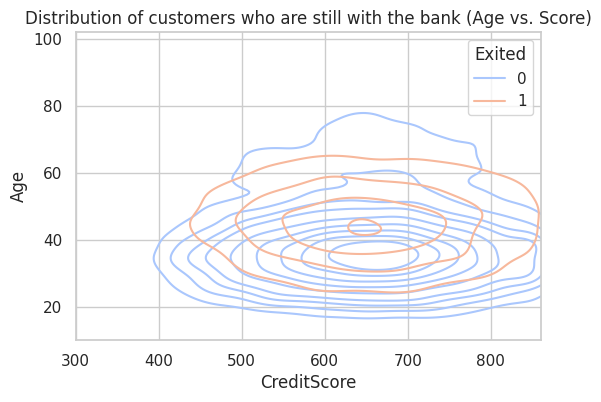

In [17]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_bank, x="CreditScore", y="Age", hue="Exited", fill=False, palette ="coolwarm")
plt.title('Distribution of customers who are still with the bank (Age vs. Score)')
plt.xlim(300, df1['CreditScore'].max() + 10)
plt.ylim(10, df1['Age'].max() + 10)
plt.show()

*   This density plot shows that customers who left the bank are slightly older.

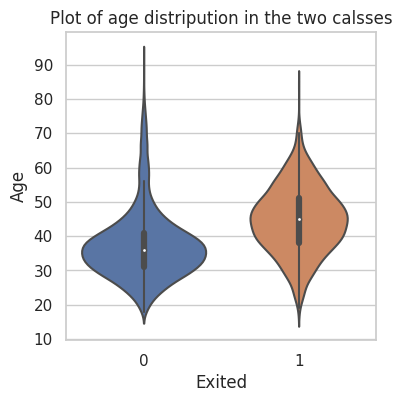

In [18]:
plt.figure(figsize=(4, 4))
sns.violinplot(x='Exited', y='Age', data=df_bank)
plt.xlabel('Exited')
plt.ylabel('Age')
plt.title('Plot of age distripution in the two calsses')
plt.show()

*   The distripution shows that customers who left the bank are slightly older. Most data of customers who stayed are in their 30s while customers who left are around 50.

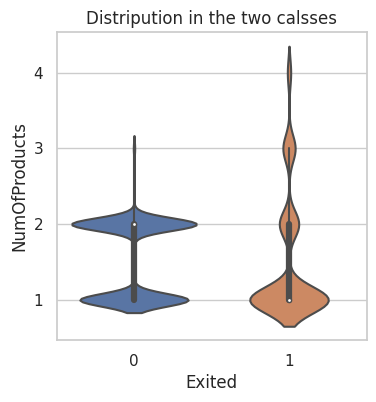

In [19]:
plt.figure(figsize=(4, 4))
sns.violinplot(x='Exited', y='NumOfProducts', data=df_bank)
plt.yticks([1, 2, 3, 4])
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')
plt.title('Distripution in the two calsses')
plt.show()

*   Interstingly, customers who left the bank were utilising more products than those who are still with the bank.

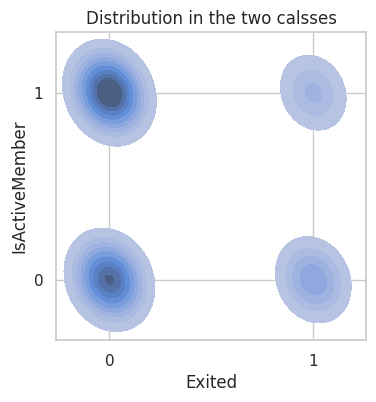

In [20]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=df_bank, x='Exited', y='IsActiveMember', fill=True)

plt.yticks([0, 1])
plt.xticks([0, 1])

plt.xlabel('Exited')
plt.ylabel('IsActiveMember')
plt.title('Distribution in the two calsses')
plt.show()

*   This density plot shows that most active customers are still with the bank.

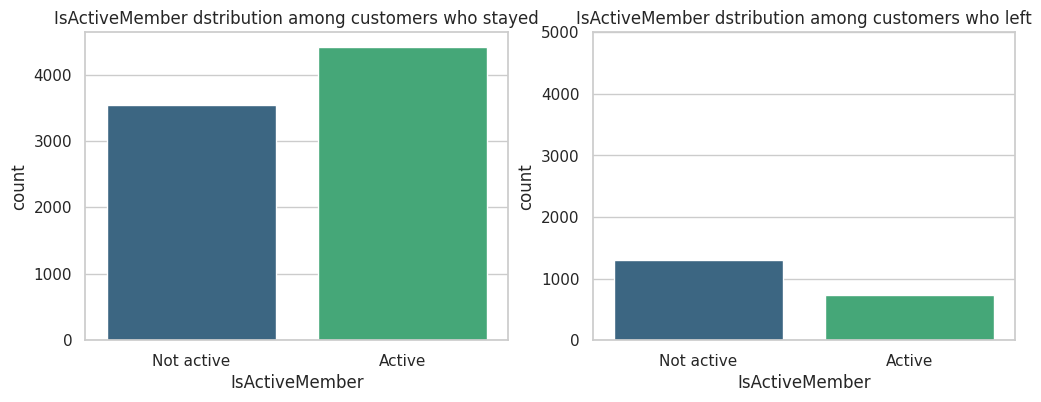

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set(style="whitegrid")
plot1= sns.countplot(x="IsActiveMember", data=df1, palette="viridis", ax=axes[0])
plot1.set_xticklabels(["Not active","Active"])
plt.ylim(0, 5000)
axes[0].set_title("IsActiveMember dstribution among customers who stayed")

# Plot the second count plot
sns.set(style="whitegrid")
plot2= sns.countplot(x="IsActiveMember", data=df2, palette="viridis", ax=axes[1])
plot2.set_xticklabels(["Not active","Active"])
plt.ylim(0, 5000)
axes[1].set_title("IsActiveMember dstribution among customers who left")

plt.show()

*   This plot shows the distribution more clearly. Most customers who left the bank were not active and most customers who are still with the bank are active.

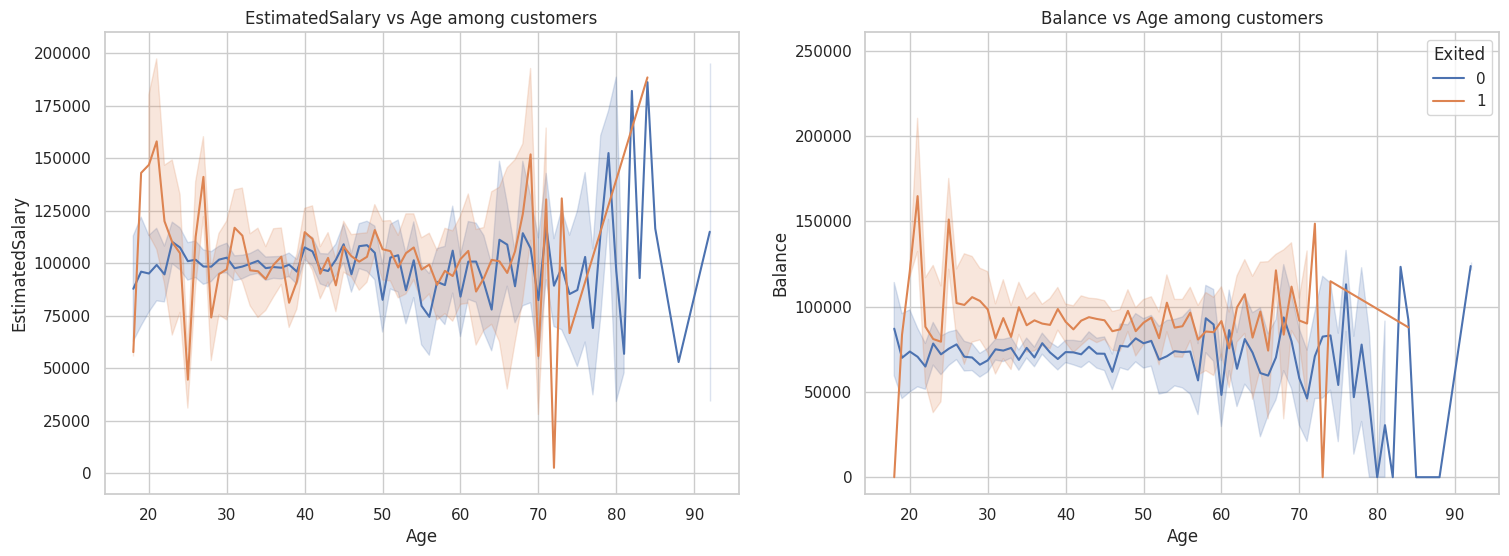

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.set(style="whitegrid")
sns.lineplot(x="Age", y="EstimatedSalary", hue="Exited",data=df_bank, ax=axes[0])
axes[0].get_legend().set_visible(False)
axes[0].set_ylim(df_bank['EstimatedSalary'].min()-10000,  df_bank['EstimatedSalary'].max() + 10000)
axes[0].set_title("EstimatedSalary vs Age among customers")

sns.set(style="whitegrid")
sns.lineplot(x="Age", y="Balance", hue="Exited",data=df_bank, ax=axes[1])
axes[1].set_ylim(df_bank['Balance'].min()-10000, df_bank['Balance'].max() + 10000)
axes[1].set_title("Balance vs Age among customers")

plt.show()



*   The second line plot shows that, on average, customers who left the bank have had higher balance in their account than those those who stayed.
*   Almost no young customers had a zero balance and no salary.



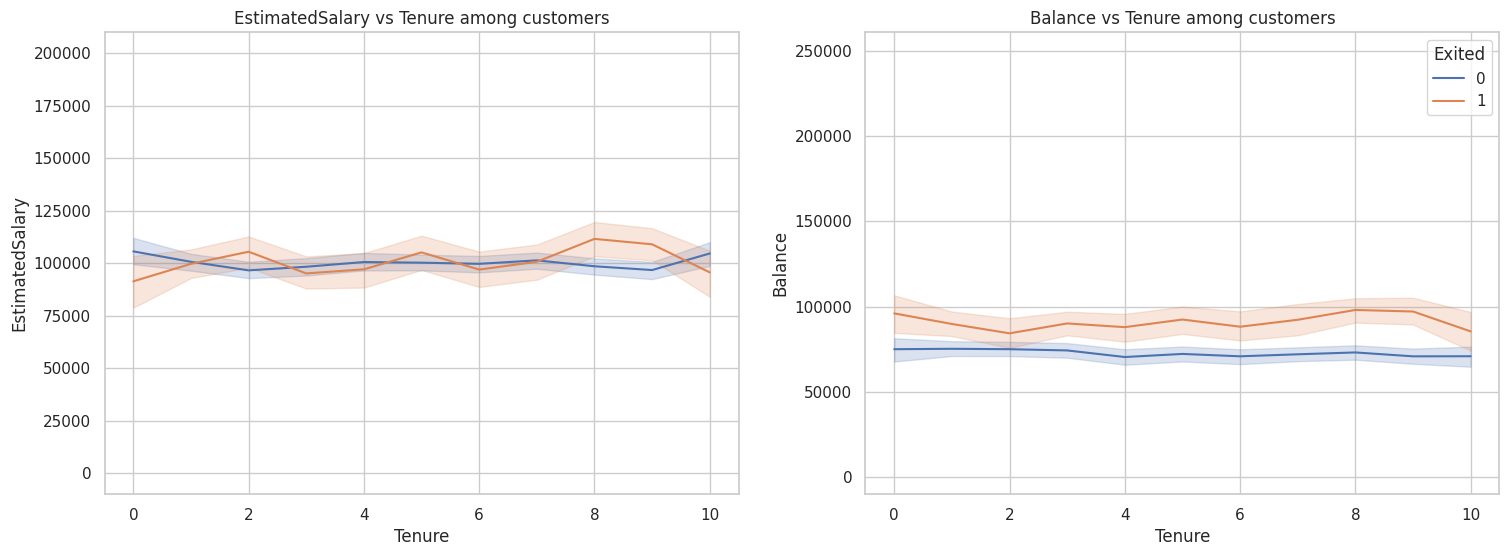

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.set(style="whitegrid")
sns.lineplot(x="Tenure", y="EstimatedSalary", hue="Exited",data=df_bank, ax=axes[0])
axes[0].get_legend().set_visible(False)
axes[0].set_ylim(df_bank['EstimatedSalary'].min()-10000,  df_bank['EstimatedSalary'].max() + 10000)
axes[0].set_title("EstimatedSalary vs Tenure among customers")

sns.set(style="whitegrid")
sns.lineplot(x="Tenure", y="Balance", hue="Exited",data=df_bank, ax=axes[1])
axes[1].set_ylim(df_bank['Balance'].min()-10000, df_bank['Balance'].max() + 10000)
axes[1].set_title("Balance vs Tenure among customers")

plt.show()

These plots show the Estimated Salary and  Balance relationship with the Tenure of customers instead of age, here we notice that the customers who had a higher balance had always had a higher balance **not only prior to leaving the account**.

# Preprocessing of Data
- Train | Test Split, Scalling

In [24]:
df_bank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [25]:
df_bank['Gender'] = df_bank['Gender'].map({'Male': 0, 'Female': 1})
df_bank['Geography'] = df_bank['Geography'].map({'Spain': 0, 'France': 1, 'Germany':2})

In [26]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X = df_bank.drop(columns=['Exited'])
y = df_bank['Exited']

In [28]:
# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the data to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 7963, 1: 7963}


In [29]:
# Step 1: Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled contain the scaled feature data, and y_train and y_test contain the target variable data.

In [30]:
print("Training data shape: ", X_train_scaled.shape)
print("Test data shape: ", X_test_scaled.shape)

Training data shape:  (13537, 10)
Test data shape:  (2389, 10)


# Modelling & Model Performance

In [35]:
import tensorflow as tf
print(tf.__version__)
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc , roc_curve


epochs=300

2.14.0


In [32]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [33]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Sun Oct 29 11:46:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## without class_weight

### Create The Model

*   Starting with small model on unbalanced data

In [36]:
tf.compat.v1.reset_default_graph

model1 = Sequential()

model1.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model1.add(Dense(6, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

print(model1.summary())
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history1= model1.fit(X_train,y_train, epochs=epochs, validation_split=0.15, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [37]:
def plot_training_validation_accuracy(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['accuracy'], label='Training', color="green")
    plt.plot(history.history['val_accuracy'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    #plt.tight_layout()
    plt.show()

def plot_training_validation_loss(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['loss'], label='Training', color="green")
    plt.plot(history.history['val_loss'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    #plt.tight_layout()
    plt.show()

def plot_training_validation_recall(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['recall'], label='Training', color="green")
    plt.plot(history.history['val_recall'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    #plt.tight_layout()
    plt.show()

def plot_AUC(y_test, y_pred):
    plt.figure(figsize=(6, 4))
    # Compute ROC curve and ROC AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Calculate ROC AUC score
    roc_auc_score_value = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Display ROC AUC score
    print(f'ROC AUC Score: {roc_auc_score_value:.2f}')

def plot_test_heatmap(mat):
    plt.figure(figsize=(4, 4))
    sns.heatmap(mat.T, square=True, annot= True, fmt='d')
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

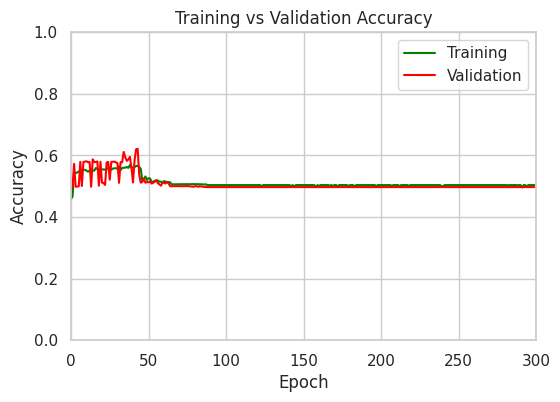

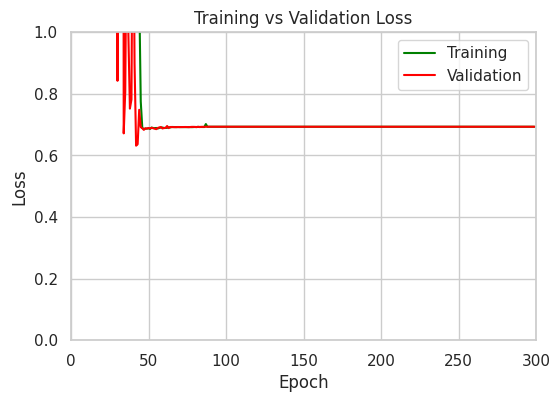

75/75 [==============================] - 0s 2ms/step


<Figure size 600x400 with 0 Axes>

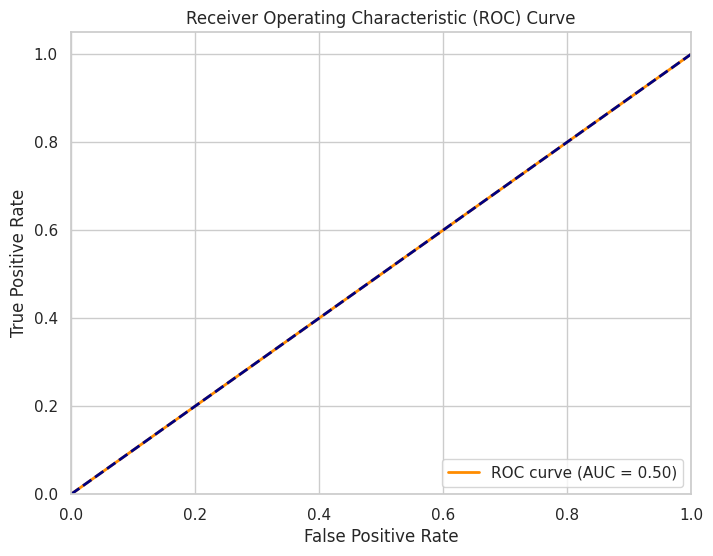

ROC AUC Score: 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1233
           1       0.48      1.00      0.65      1156

    accuracy                           0.48      2389
   macro avg       0.24      0.50      0.33      2389
weighted avg       0.23      0.48      0.32      2389



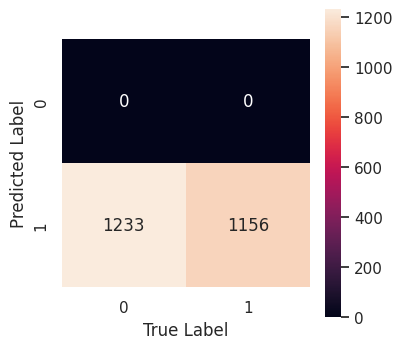

In [38]:
plot_training_validation_accuracy(history1)
plot_training_validation_loss(history1)

y_pred = model1.predict(X_test) > 0.5
plot_AUC(y_test, y_pred)

mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

*   This model cannot exceed 80% accuracy

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 36)                396       
                                                                 
 dense_7 (Dense)             (None, 18)                666       
                                                                 
 dense_8 (Dense)             (None, 9)                 171       
                                                                 
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1243 (4.86 KB)
Trainable params: 1243 (4.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


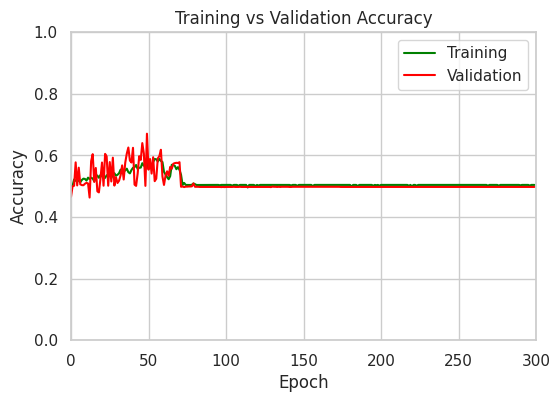

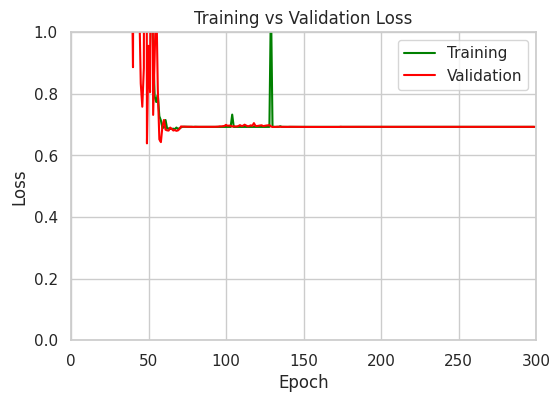

75/75 [==============================] - 0s 2ms/step


<Figure size 600x400 with 0 Axes>

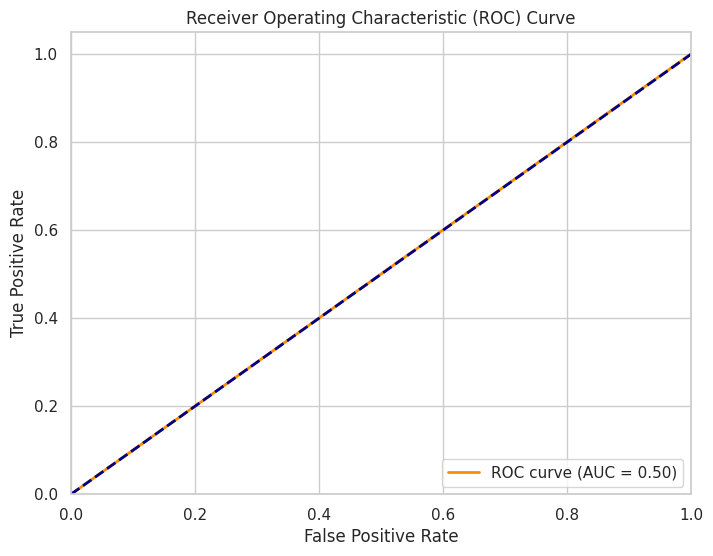

ROC AUC Score: 0.50
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1233
           1       0.48      1.00      0.65      1156

    accuracy                           0.48      2389
   macro avg       0.74      0.50      0.33      2389
weighted avg       0.75      0.48      0.32      2389



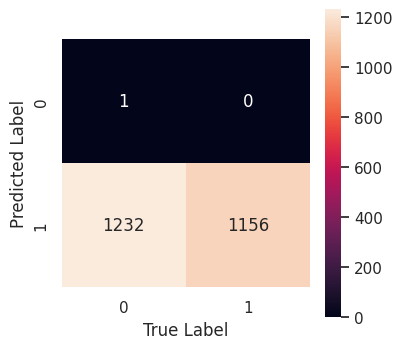

In [39]:
tf.compat.v1.reset_default_graph

model2 = Sequential()

model2.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model2.add(Dense(18, activation="relu"))
model2.add(Dense(9, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

print(model2.summary())
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history2= model2.fit(X_train,y_train, epochs=epochs, validation_split=0.15, verbose=0)


plot_training_validation_accuracy(history2)
plot_training_validation_loss(history2)

y_pred = model2.predict(X_test) > 0.5
plot_AUC(y_test, y_pred)

mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## with class_weight

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [40]:
tf.compat.v1.reset_default_graph

model3 = Sequential()

model3.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model3.add(Dense(6, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

print(model3.summary())
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history3= model3.fit(X_train,y_train, epochs=epochs, validation_split=0.15, verbose=0, class_weight={0:1, 1:2}) ## Giving more importance for class 1 by assigning a higher weight

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 6)                 66        
                                                                 
 dense_12 (Dense)            (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

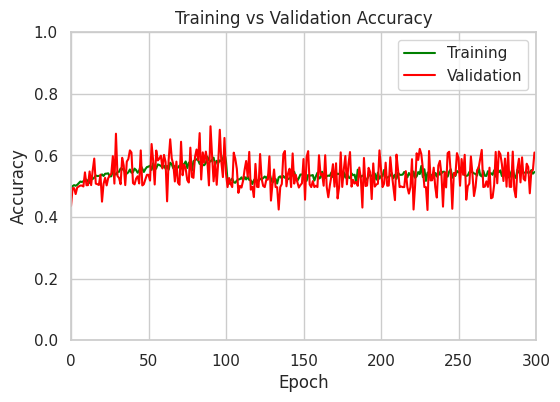

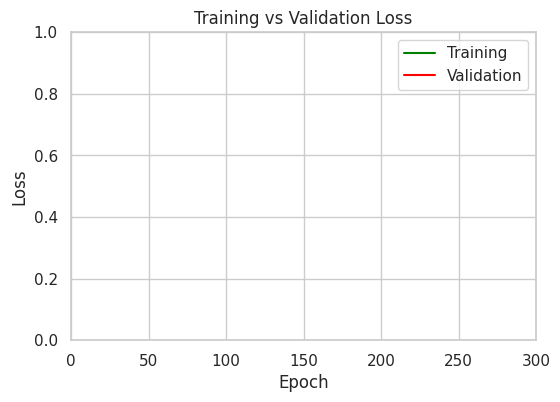

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.35      0.47      1233
           1       0.55      0.86      0.67      1156

    accuracy                           0.60      2389
   macro avg       0.64      0.60      0.57      2389
weighted avg       0.64      0.60      0.57      2389



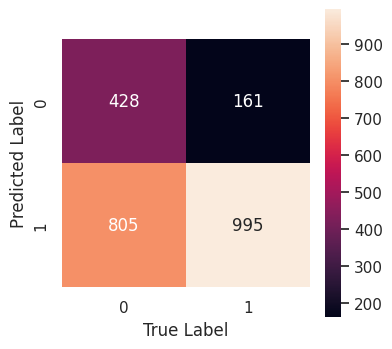

In [41]:
plot_training_validation_accuracy(history3)
plot_training_validation_loss(history3)

y_pred = model3.predict(X_test) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [42]:
default_optimizer = Adam()
default_learning_rate = default_optimizer.learning_rate
print("Default learning rate:", default_learning_rate)

Default learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 6)                 66        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


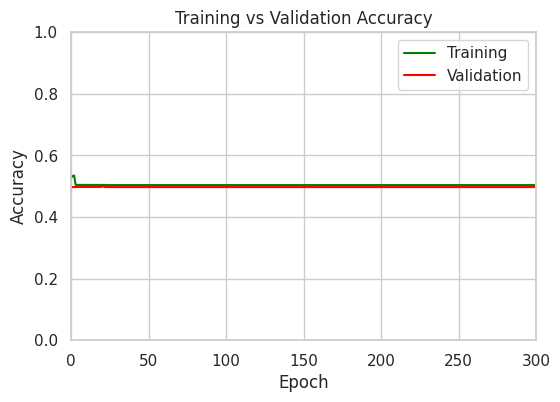

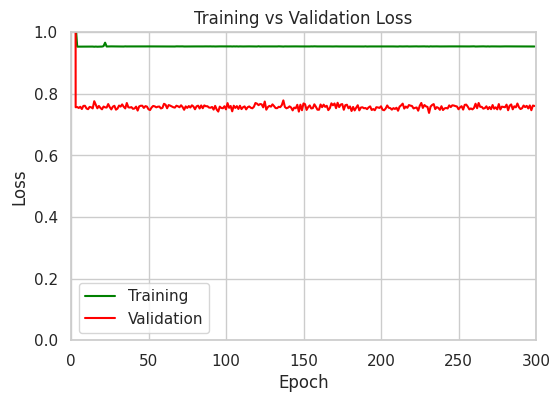

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1233
           1       0.48      1.00      0.65      1156

    accuracy                           0.48      2389
   macro avg       0.24      0.50      0.33      2389
weighted avg       0.23      0.48      0.32      2389



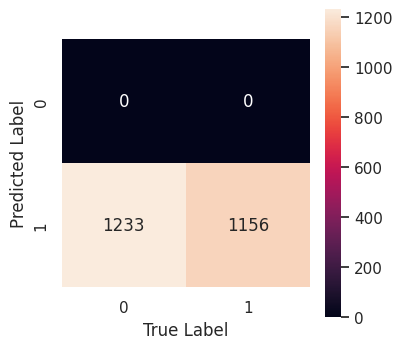

In [43]:
tf.compat.v1.reset_default_graph

model4 = Sequential()

model4.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model4.add(Dense(6, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

print(model4.summary())
model4.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
history4= model4.fit(X_train,y_train, epochs=epochs, validation_split=0.15, verbose=0, class_weight={0:1, 1:2})


### Evaluate

plot_training_validation_accuracy(history4)
plot_training_validation_loss(history4)

y_pred = model4.predict(X_test) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 6)                 66        
                                                                 
 dense_18 (Dense)            (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


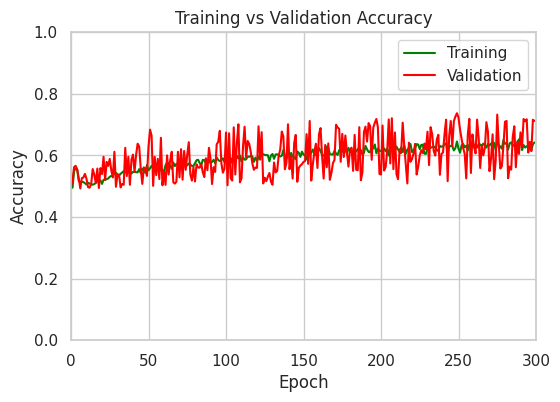

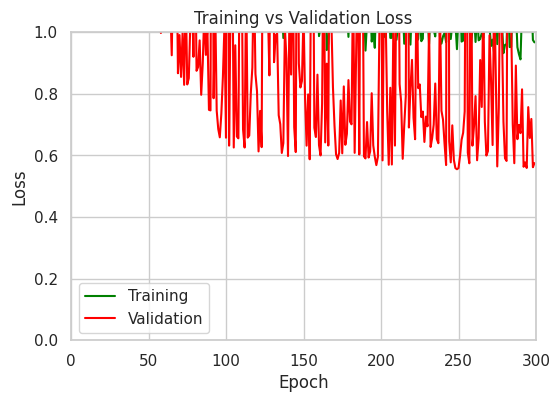

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      1233
           1       0.64      0.86      0.73      1156

    accuracy                           0.70      2389
   macro avg       0.72      0.70      0.69      2389
weighted avg       0.72      0.70      0.69      2389



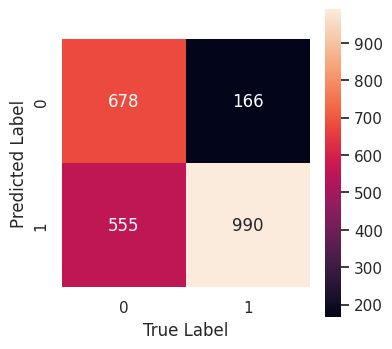

In [44]:
tf.compat.v1.reset_default_graph

model5 = Sequential()

model5.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dense(6, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

print(model5.summary())
model5.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
history5= model5.fit(X_train,y_train, epochs=epochs, validation_split=0.15, verbose=0, class_weight={0:1, 1:2})


### Evaluate

plot_training_validation_accuracy(history5)
plot_training_validation_loss(history5)

y_pred = model5.predict(X_test) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 6)                 66        
                                                                 
 dense_21 (Dense)            (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


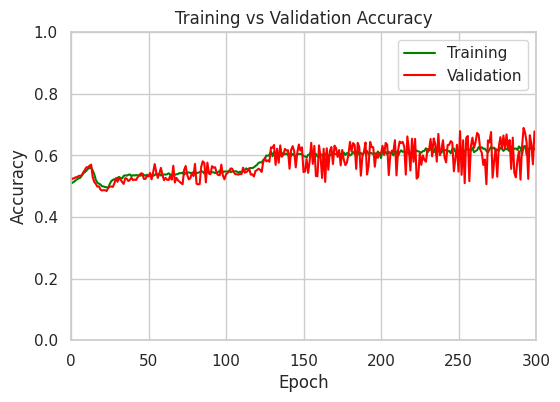

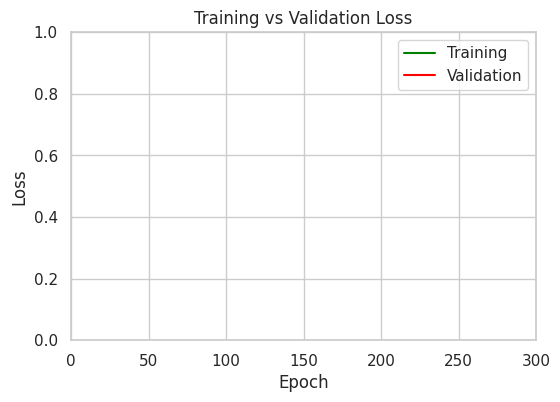

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.54      0.63      1233
           1       0.62      0.80      0.70      1156

    accuracy                           0.67      2389
   macro avg       0.68      0.67      0.66      2389
weighted avg       0.68      0.67      0.66      2389



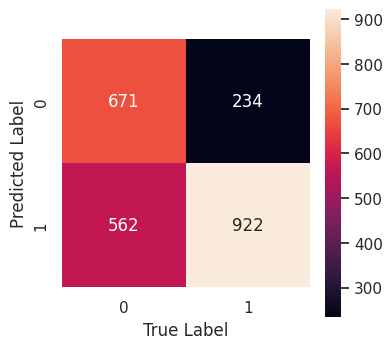

In [45]:
tf.compat.v1.reset_default_graph

model5 = Sequential()

model5.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dense(6, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

print(model5.summary())
model5.compile(optimizer=Adam(learning_rate=0.00001), loss="binary_crossentropy", metrics=["accuracy"])
history5= model5.fit(X_train,y_train, epochs=epochs, validation_split=0.15, verbose=0, class_weight={0:1, 1:2})


### Evaluate

plot_training_validation_accuracy(history5)
plot_training_validation_loss(history5)

y_pred = model5.predict(X_test) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Dropout Layer

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_23 (Dense)            (None, 6)                 66        
                                                                 
 dense_24 (Dense)            (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


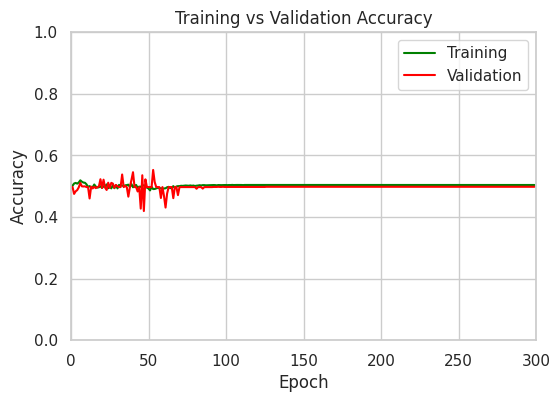

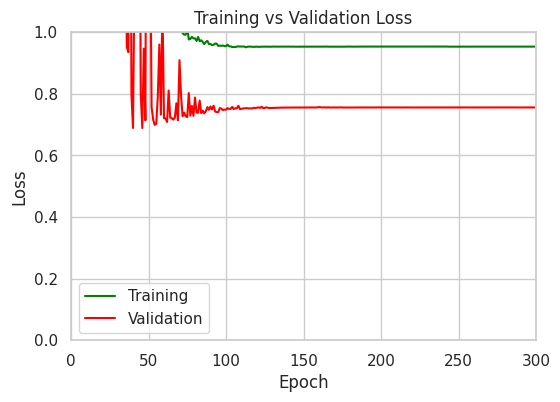

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1233
           1       0.48      1.00      0.65      1156

    accuracy                           0.48      2389
   macro avg       0.74      0.50      0.33      2389
weighted avg       0.75      0.48      0.32      2389



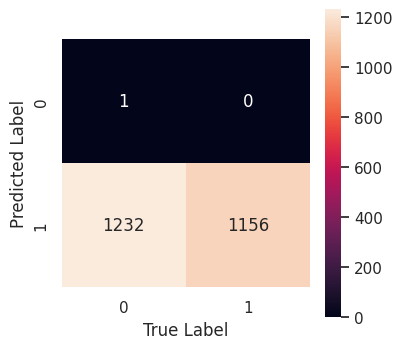

In [46]:
tf.compat.v1.reset_default_graph

model6 = Sequential()

model6.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model6.add(Dropout(0.5))
model6.add(Dense(6, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

print(model6.summary())
model6.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
history6= model6.fit(X_train,y_train, epochs=epochs, validation_split=0.15, verbose=0, class_weight={0:1, 1:2})


### Evaluate

plot_training_validation_accuracy(history6)
plot_training_validation_loss(history6)

y_pred = model6.predict(X_test) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

*   Dropout layer didn't improve the model

### Add Early Stop

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 15: early stopping


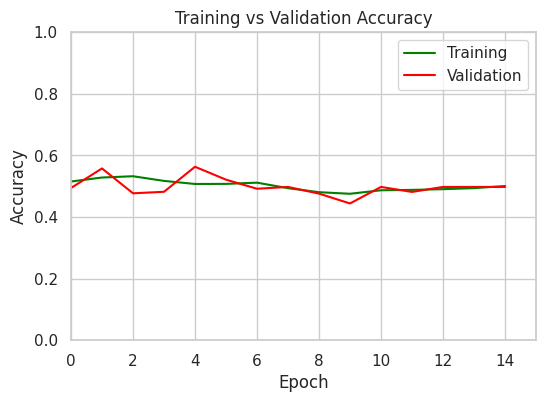

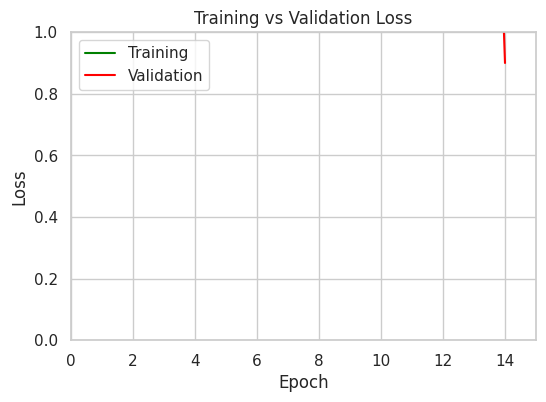

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1233
           1       0.48      1.00      0.65      1156

    accuracy                           0.48      2389
   macro avg       0.74      0.50      0.33      2389
weighted avg       0.75      0.48      0.32      2389



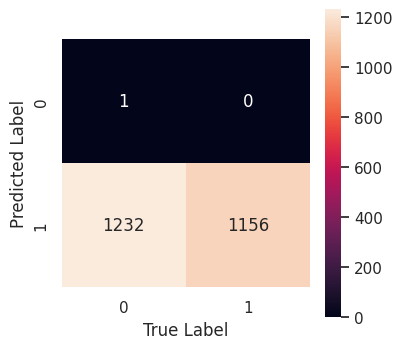

In [47]:
tf.compat.v1.reset_default_graph()

model7 = Sequential()

model7.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model7.add(Dense(6, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

print(model7.summary())

model7.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)

history7 = model7.fit(X_train, y_train, epochs=epochs, validation_split=0.15, verbose=0, class_weight={0: 1, 1: 2}, callbacks=[early_stopping])


### Evaluate

plot_training_validation_accuracy(history7)
plot_training_validation_loss(history7)

y_pred = model7.predict(X_test) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Monitor the "val_loss" as metric

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 5: early stopping


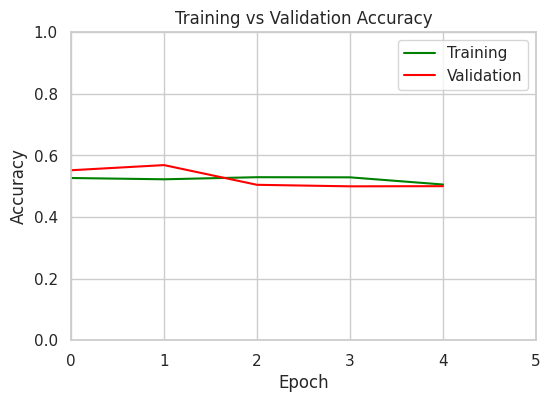

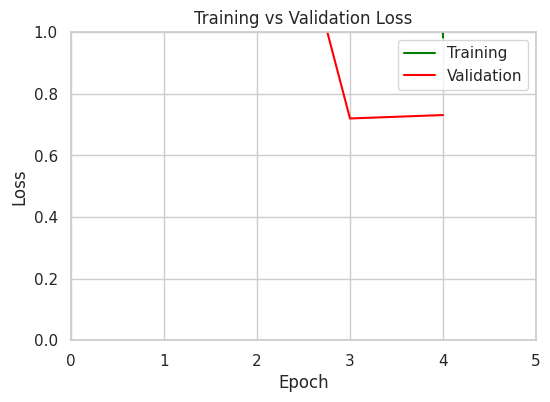

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.01      0.01      1233
           1       0.48      1.00      0.65      1156

    accuracy                           0.49      2389
   macro avg       0.59      0.50      0.33      2389
weighted avg       0.60      0.49      0.32      2389



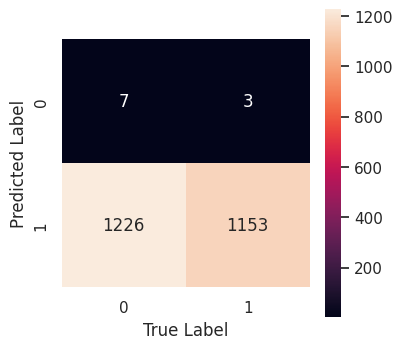

In [48]:
tf.compat.v1.reset_default_graph()

model8 = Sequential()

model8.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model8.add(Dense(6, activation="relu"))
model8.add(Dense(1, activation="sigmoid"))

print(model8.summary())

model8.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=4,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)

history8 = model8.fit(X_train, y_train, epochs=epochs, validation_split=0.15, verbose=0, class_weight={0: 1, 1: 2}, callbacks=[early_stopping])


### Evaluate

plot_training_validation_accuracy(history8)
plot_training_validation_loss(history8)

y_pred = model8.predict(X_test) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Monitor the "val_recall" as metric

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 10: early stopping


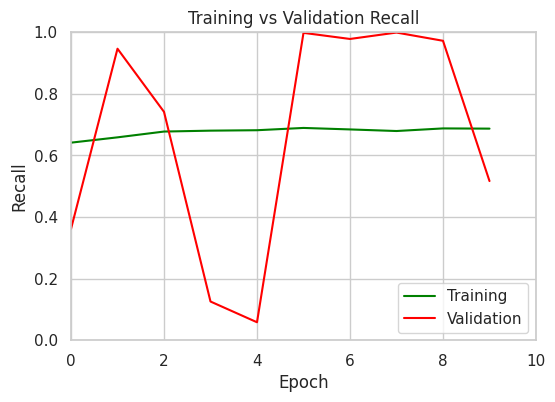

75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.47      0.40      0.43      1233
           1       0.45      0.52      0.48      1156

    accuracy                           0.46      2389
   macro avg       0.46      0.46      0.46      2389
weighted avg       0.46      0.46      0.46      2389



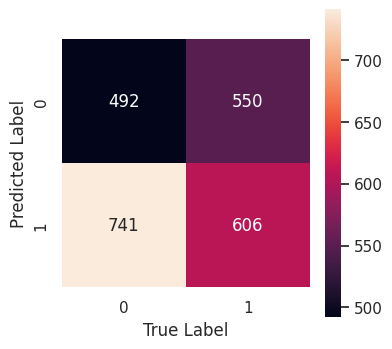

In [49]:
tf.compat.v1.reset_default_graph()

model9 = Sequential()

model9.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model9.add(Dense(6, activation="relu"))
model9.add(Dense(1, activation="sigmoid"))

print(model9.summary())

model9.compile(optimizer="adam", loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_recall',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=4,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)

history9 = model9.fit(X_train, y_train, epochs=epochs, validation_split=0.15, verbose=0, class_weight={0: 1, 1: 2}, callbacks=[early_stopping])


### Evaluate

#plot_training_validation_accuracy(history9)
#plot_training_validation_loss(history9)
plot_training_validation_recall(history9)

y_pred = model9.predict(X_test) > 0.5
mat= metrics.confusion_matrix(y_test, y_pred)
plot_test_heatmap(mat)


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Optuna

In [51]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.0 MB/s eta 0:00:00


In [52]:
from keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [53]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [54]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [55]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-29 12:46:14,978] A new study created in memory with name: no-name-c9b7497d-a27b-49a7-8639-4bfbfea5e42d


Restoring model weights from the end of the best epoch: 27.
Epoch 42: early stopping


[I 2023-10-29 12:46:51,690] Trial 0 finished with value: 0.4914190173149109 and parameters: {'n_units1': 19, 'n_units2': 75, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 4.243332971096254e-05, 'w0': 1.1880360535545118, 'w1': 0.04219023437029849}. Best is trial 0 with value: 0.4914190173149109.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-29 12:47:13,620] Trial 1 finished with value: 0.4964420199394226 and parameters: {'n_units1': 62, 'n_units2': 110, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0001571579560059915, 'w0': 1.3418126291753083, 'w1': 0.04589203948123889}. Best is trial 1 with value: 0.4964420199394226.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-29 12:47:32,921] Trial 2 finished with value: 0.4876517355442047 and parameters: {'n_units1': 27, 'n_units2': 72, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0013435570321297758, 'w0': 0.051078042942819354, 'w1': 0.048828927498869}. Best is trial 1 with value: 0.4964420199394226.


Restoring model weights from the end of the best epoch: 41.
Epoch 56: early stopping


[I 2023-10-29 12:48:15,260] Trial 3 finished with value: 0.5161155462265015 and parameters: {'n_units1': 102, 'n_units2': 106, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.11826714236571571, 'w0': 0.6180047006863368, 'w1': 0.1374929173651827}. Best is trial 3 with value: 0.5161155462265015.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 12:48:29,267] Trial 4 finished with value: 0.4838844835758209 and parameters: {'n_units1': 45, 'n_units2': 8, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.008733091685170568, 'w0': 1.1432162204531422, 'w1': 2.9241199104776223}. Best is trial 3 with value: 0.5161155462265015.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-29 12:49:11,106] Trial 5 finished with value: 0.5161155462265015 and parameters: {'n_units1': 51, 'n_units2': 115, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.10315747604684423, 'w0': 1.393591055220383, 'w1': 0.062135629483111854}. Best is trial 3 with value: 0.5161155462265015.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-29 12:49:32,667] Trial 6 finished with value: 0.4838844835758209 and parameters: {'n_units1': 78, 'n_units2': 24, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.044793240002736476, 'w0': 0.014321118248329432, 'w1': 0.0904083872769302}. Best is trial 3 with value: 0.5161155462265015.


Restoring model weights from the end of the best epoch: 27.
Epoch 42: early stopping


[I 2023-10-29 12:50:14,653] Trial 7 finished with value: 0.5161155462265015 and parameters: {'n_units1': 68, 'n_units2': 58, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001765178192025568, 'w0': 1.118626771989332, 'w1': 0.055647695896535926}. Best is trial 3 with value: 0.5161155462265015.


Restoring model weights from the end of the best epoch: 31.
Epoch 46: early stopping


[I 2023-10-29 12:50:56,465] Trial 8 finished with value: 0.5161155462265015 and parameters: {'n_units1': 27, 'n_units2': 12, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.003506160602039499, 'w0': 2.7791146704690086, 'w1': 0.01009696657057904}. Best is trial 3 with value: 0.5161155462265015.


Restoring model weights from the end of the best epoch: 56.
Epoch 71: early stopping


[I 2023-10-29 12:51:57,403] Trial 9 finished with value: 0.569694459438324 and parameters: {'n_units1': 58, 'n_units2': 113, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0011072713771909728, 'w0': 0.028783597444403248, 'w1': 0.021915396571045895}. Best is trial 9 with value: 0.569694459438324.


{'n_units1': 58,
 'n_units2': 113,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 0.0011072713771909728,
 'w0': 0.028783597444403248,
 'w1': 0.021915396571045895}

In [59]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    epochs=epochs,
    callbacks=[early_stop],
    verbose=0,
)


history = model.history.history


y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Restoring model weights from the end of the best epoch: 102.
Epoch 117: early stopping
75/75 [==============================] - 0s 2ms/step
[[900 333]
 [397 759]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1233
           1       0.70      0.66      0.68      1156

    accuracy                           0.69      2389
   macro avg       0.69      0.69      0.69      2389
weighted avg       0.69      0.69      0.69      2389



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

75/75 [==============================] - 0s 2ms/step


0.7582092232914349

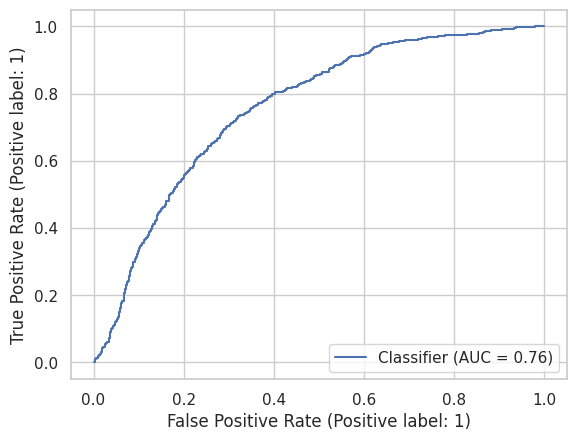

In [60]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)



roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___